In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
def mesh_grid_visual(X, y, model, X_test = None, y_test = None):
    x0 = np.linspace(np.min(X[:,0])-2, np.max(X[:,0])+2, 100)
    x1 = np.linspace(np.min(X[:,1])-2, np.max(X[:,1])+2, 100)
    a,b = np.meshgrid(x0, x1)
    X_new = np.c_[a.ravel(), b.ravel()]
    predictions = model.predict(X_new)
    if "sklearn" in str(type(model)):
        decision = model.decision_function(X_new)
#         decision = np.max(model.decision_function(X_new), axis = 1)
    else:
        decision = model.decision(X_new)
    if len(np.unique(y)) > 2:
        decision = np.max(model.decision_function(X_new), axis = 1)
    
    plt.contourf(x0, x1, predictions.reshape(a.shape), cmap=plt.cm.brg, alpha = 0.4)
    plt.contourf(x0, x1, decision.reshape(a.shape), cmap=plt.cm.brg, alpha = 0.2)
    for yy in np.unique(y):
        plt.scatter(X[y == yy, 0], X[y==yy, 1], label = "Train:" + str(yy), marker = 'x')
        if isinstance(X_test, np.ndarray):
            plt.scatter(X_test[y_test == yy, 0], X_test[y_test == yy, 1], label = "Test: "+ str(yy), marker = 'o', s = 100, alpha = 1.0, linewidths=1, c = '', edgecolor = 'black')
            
    plt.legend(loc = 'upper left')

In [3]:
iris = load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [4]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3)

In [6]:
svm = SVC(kernel = 'linear', C = 1.0)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

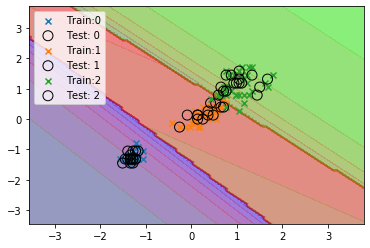

In [12]:
# Linear Kernel
mesh_grid_visual(X_train, y_train, svm, X_test, y_test)

In [35]:
svmRBF = SVC(kernel = 'rbf', gamma = 100, C = 3) # Gamma - Legth of examples (in this case overfitting), C - margines width bigger C smaller margin
svmRBF.fit(X_train, y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

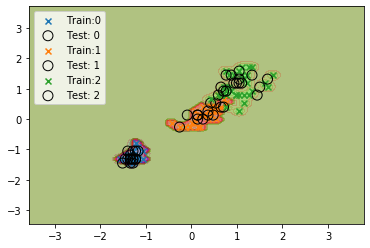

In [36]:
# Kernel RBF
mesh_grid_visual(X_train, y_train, svmRBF, X_test, y_test)